In [1]:
import numpy
import matplotlib.pyplot
%matplotlib inline

In [2]:
#load the mnist test data CSV file into a list 
data_file = open("mnist_dataset/mnist_test_10.csv", 'r') 
data_list = data_file.readlines() 
data_file.close()

In [3]:
class MNISTExplorer:
    
    def __init__(self, file_name):
    
        self.file_name = file_name
        
        data_file = open(file_name, "r")
        self.raw_data_list = data_file.readlines()
        data_file.close()
        
        
    def raw_data(self, index):
        return self.raw_data_list[index]
    
    
    def setup(self):
        self.store = list(map(self.process_item, self.raw_data_list))
        
        
    def process_item(self, item):
        
        all_values = item.split(',')
        
        label, image_data = all_values[0], all_values[1:]
        
        input_nomalized = (numpy.asfarray(image_data) / 255.0 * 0.99) + 0.01

        image_array = numpy.asfarray(input_nomalized).reshape((28, 28))
        
        return (label, input_nomalized, image_array)

        
    def item(self, index):
        
        if index < len(self.store):
            return self.store[index]

        return None

In [4]:
me = MNISTExplorer("mnist_dataset/mnist_test_10.csv")
me.setup()

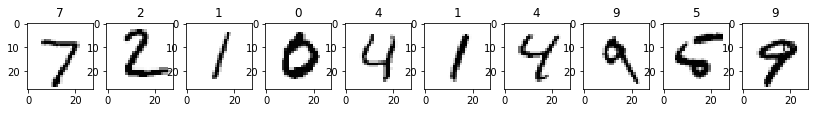

In [5]:

_, sb = matplotlib.pyplot.subplots(ncols=10, figsize=(14,14))

for index in range(len(me.store)):
    label, image_data, image_array = me.item(index)
    sb[index].imshow(image_array, cmap='Greys', interpolation='None')
    sb[index].set_title(label)
    